In [1]:
# Q1) Given a list of 2-D coordinates, write a function that returns True if the points lie on a straight line and False otherwise.
    # Use only the Python standard libraries.
#
# collinear([[1,1], [2,2], [4,4], [-10, -10]]) = True
# collinear([[1,0], [2,0], [3,1]]) = False 

In [2]:
def collinear(points):
    
    #check for lessthan 2 points
    if len(points) < 2:
        return True  

    # get x and y values from points
    x = [point[0] for point in points]
    y = [point[1] for point in points]

    # get means of x and y
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)

    # get the slope (m) of the best fit line
    numerator = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
    denominator = sum((xi - x_mean) ** 2 for xi in x)
    if denominator == 0:  # Avoid division by zero (vertical line case)
        return all(xi == x[0] for xi in x)
    
    slope = numerator / denominator

    # get residuals and R2
    intercept = y_mean - slope * x_mean
    ss_total = sum((yi - y_mean) ** 2 for yi in y)
    ss_residual = sum((yi - (slope * xi + intercept)) ** 2 for xi, yi in zip(x, y))
    
    r_squared = 1 - (ss_residual / ss_total)

    # check if R2 is 1 (Collinearity)
    return r_squared == 1.0



In [3]:
# Examples
print(collinear([[1, 1], [2, 2], [4, 4], [-10, -10]]))  # True
print(collinear([[1, 0], [2, 0], [3, 1]]))  # False


True
False


In [4]:
# Q2) Define a function that returns the frequencies of the last digits of a list of nonnegative integers. 

#     Use only the Python standard libraries.
#     Given the list [49, 10, 20, 5, 30, 785]: 
#     9 is the last digit once (in 49), 
#     0 is the last digit three times (in 10, 20, and 30), 
#     5 is the last digit two times (in 5 and 785) 
# 	last_digit_counts([49, 10, 20, 5, 30, 785]) 
#   = {9:1, 0:3, 5:2} # or something equivalent

In [5]:
from collections import defaultdict

def frequency_lastdigits(li):
    
    #Initialize an empty default dict
    d=defaultdict(int)
    for i in li:
        n=i%10
        d[n]+=1
    return dict(d)

In [6]:
# Example usage
print(frequency_lastdigits([49, 10, 20, 5, 30, 785]))

{9: 1, 0: 3, 5: 2}


In [7]:
# Q3) Using whatever library you like, make an effective 
#     visualization for the data stored here: 
#     https://github.com/michaelbilow/open-data/raw/main/spotify-2023.xlsx 
#     It consists the most streamed songs on Spotify in 2023,
#     along with their artist, key, mode, and year of publication.
#     Write 1-2 sentences about what you're trying to show.

# Importing Libraries

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read File to Data Frame

In [10]:
df=pd.read_excel(r'/workspaces/oops_python/spotify-2023.xlsx')
df.head()

,Track Name,Artist,Year Released,Streams,BPM,Key,Mode
0,Blinding Lights,The Weeknd,2019,3703895074,171,C#,Major
1,Shape of You,Ed Sheeran,2017,3562543890,96,C#,Minor
2,Someone You Loved,Lewis Capaldi,2018,2887241814,110,C#,Major
3,Dance Monkey,Tones and I,2019,2864791672,98,F#,Minor
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2018,2808096550,90,D,Major


# Descriptive Analytics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Track Name     137 non-null    object
 1   Artist         137 non-null    object
 2   Year Released  137 non-null    int64 
 3   Streams        137 non-null    int64 
 4   BPM            137 non-null    int64 
 5   Key            122 non-null    object
 6   Mode           137 non-null    object
dtypes: int64(3), object(4)
memory usage: 7.6+ KB


In [12]:
df[['Streams', 'BPM']].describe().T

,count,mean,std,min,25%,50%,75%,max
Streams,137.0,1.665058e+09,5.176519e+08,1.089402e+09,1.256881e+09,1.553498e+09,1.897518e+09,3.703895e+09
BPM,137.0,1.222993e+02,2.829008e+01,7.100000e+01,1.000000e+02,1.200000e+02,1.440000e+02,1.860000e+02


In [13]:
df.isnull().mean()

Track Name       0.000000
Artist           0.000000
Year Released    0.000000
Streams          0.000000
BPM              0.000000
Key              0.109489
Mode             0.000000
dtype: float64

In [14]:
df.columns

Index(['Track Name', 'Artist', 'Year Released', 'Streams', 'BPM', 'Key',
       'Mode'],
      dtype='object')

# Ploting Visualizations

/tmp/ipykernel_2275/3991826270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Streams', data=df.nlargest(5, 'Streams'), palette='viridis')


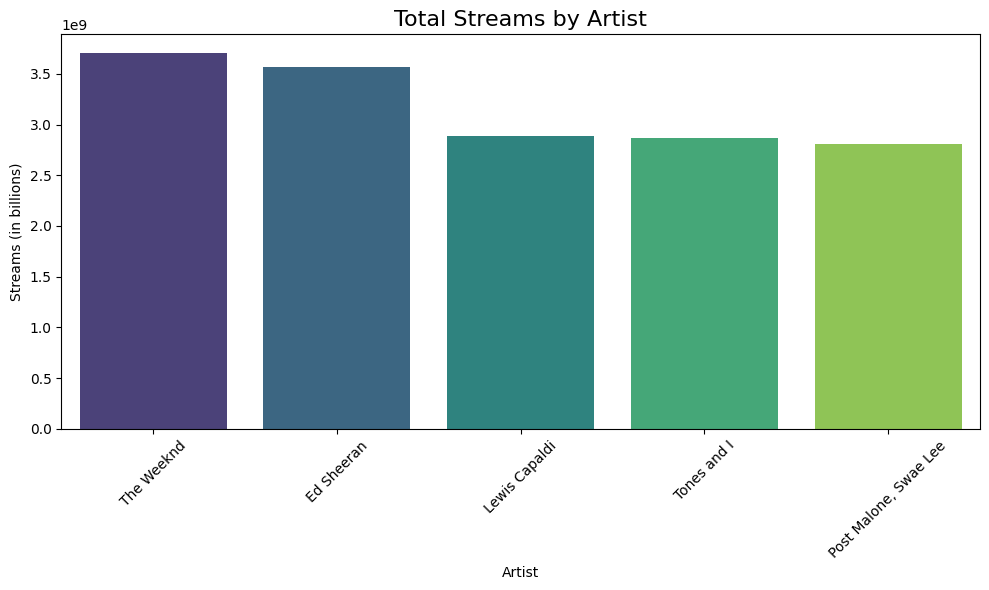

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Artist', y='Streams', data=df.nlargest(5, 'Streams'), palette='viridis')
plt.title('Total Streams by Artist', fontsize=16)
plt.ylabel('Streams (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

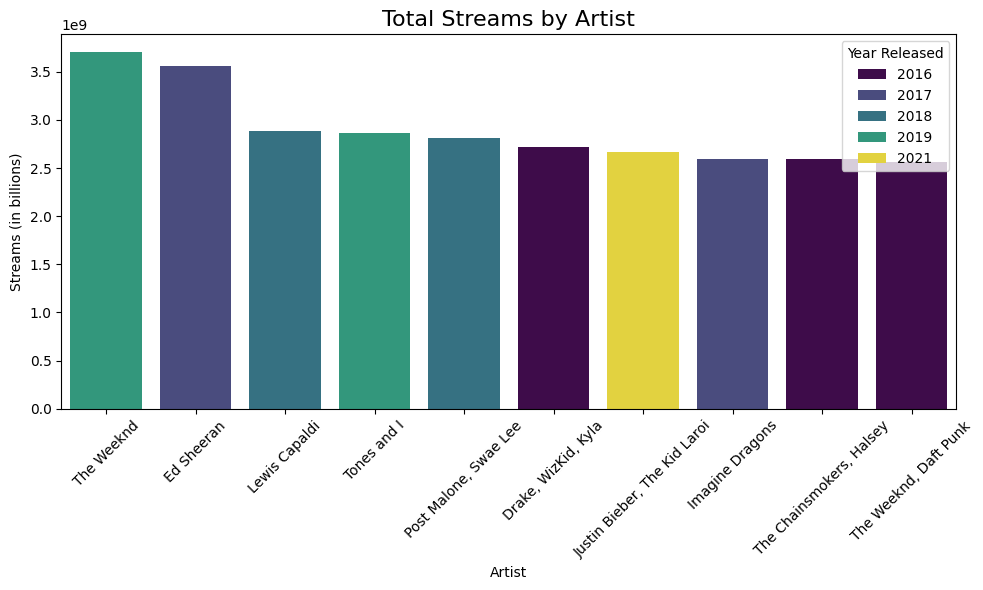

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Artist', y='Streams', data=df.nlargest(10, 'Streams'), palette='viridis',hue='Year Released')
plt.title('Total Streams by Artist', fontsize=16)
plt.ylabel('Streams (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

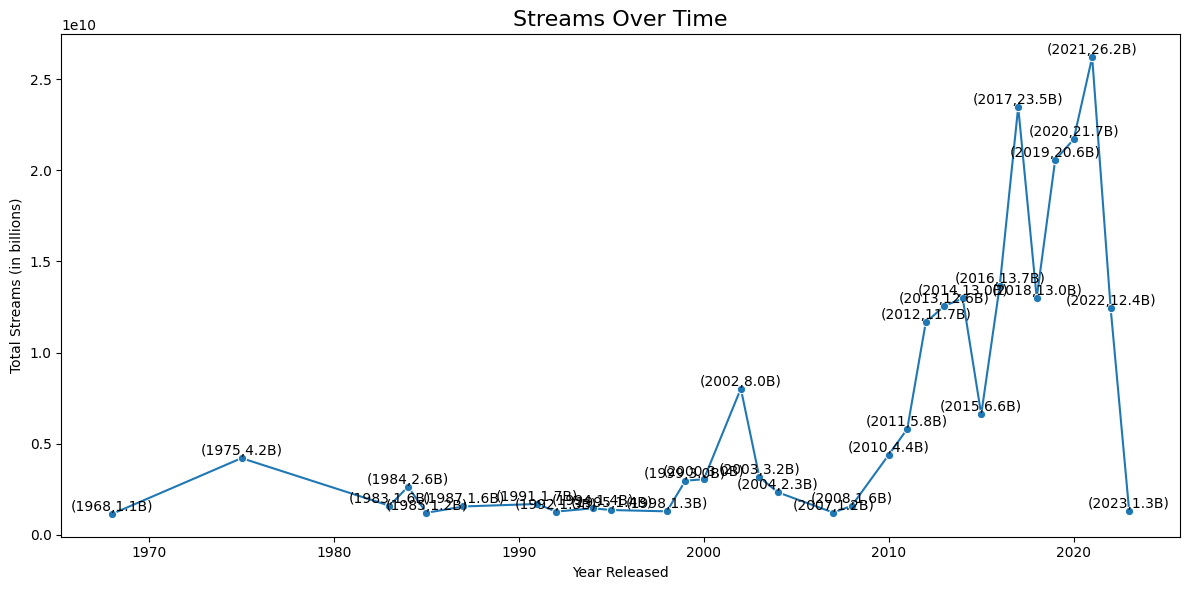

In [17]:
streams_by_year = df.groupby('Year Released')['Streams'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Released', y='Streams', data=streams_by_year, marker='o')
plt.title('Streams Over Time', fontsize=16)
plt.ylabel('Total Streams (in billions)')
plt.xlabel('Year Released')
plt.tight_layout()
for x, y in zip(streams_by_year['Year Released'], streams_by_year['Streams']):
    y_mod=y/1000000000
    plt.text(x,y, f'({x},{y_mod:.1f}B)', ha='center', va='bottom')
plt.show()

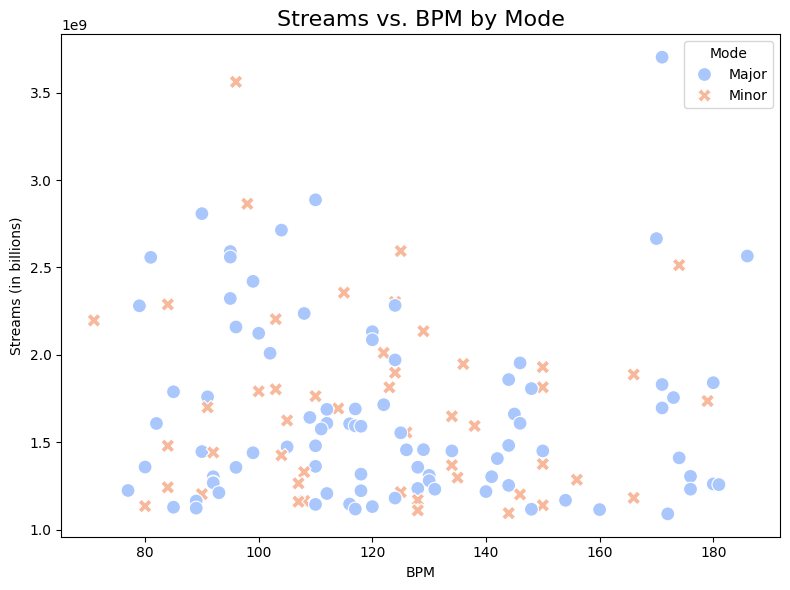

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BPM', y='Streams', hue='Mode', style='Mode', data=df, s=100, palette='coolwarm')
plt.title('Streams vs. BPM by Mode', fontsize=16)
plt.ylabel('Streams (in billions)')
plt.xlabel('BPM')
plt.tight_layout()
plt.show()


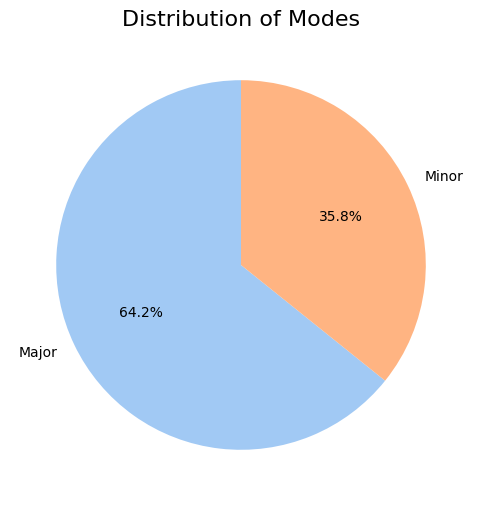

In [19]:
mode_counts = df['Mode'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Modes', fontsize=16)
plt.show()


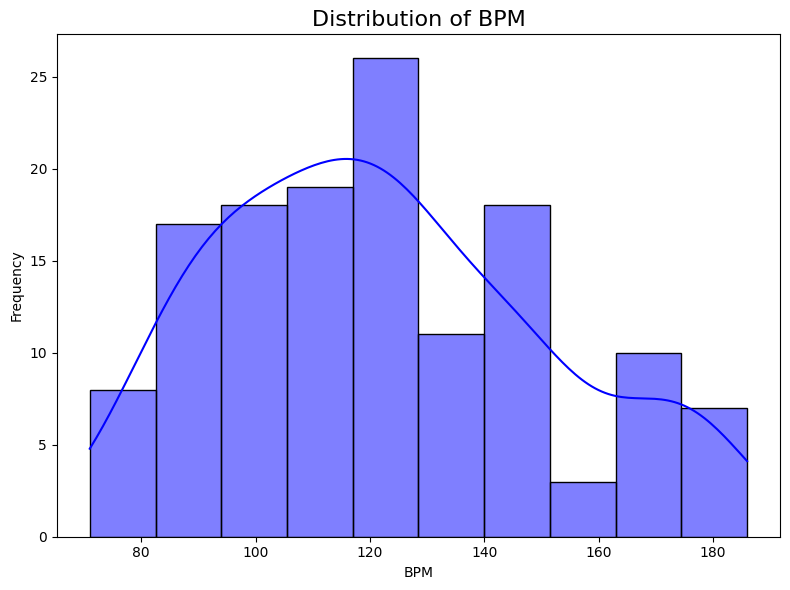

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BPM'], bins=10, kde=True, color='blue')
plt.title('Distribution of BPM', fontsize=16)
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


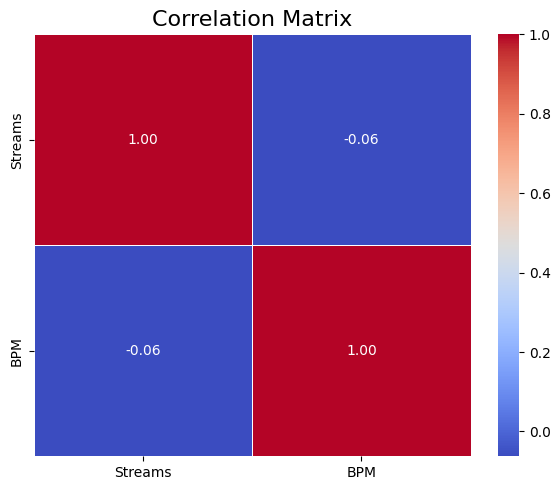

In [21]:
numeric_cols = ['Streams', 'BPM']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


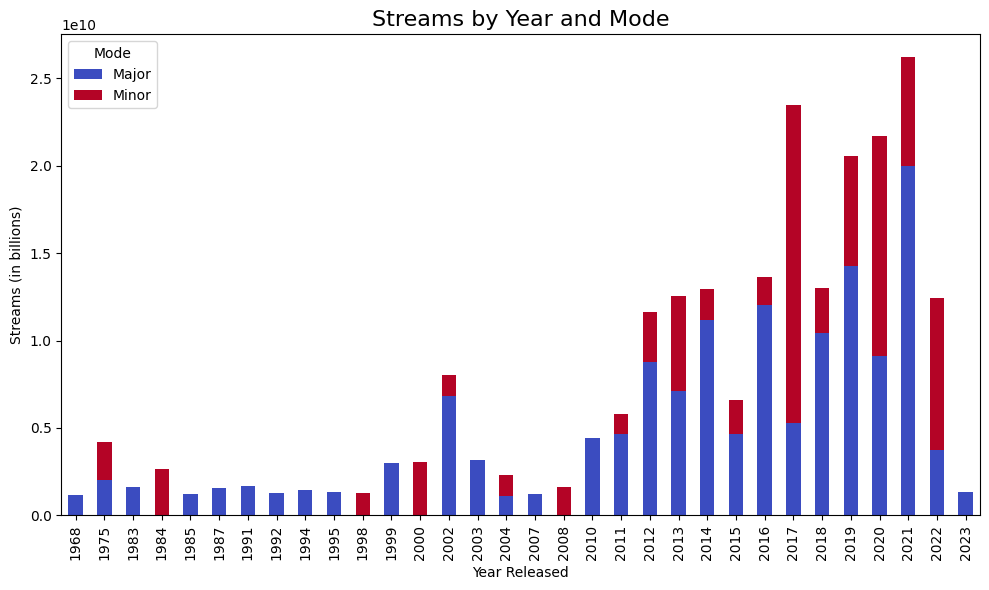

In [22]:
streams_by_year_mode = df.groupby(['Year Released', 'Mode'])['Streams'].sum().unstack()

streams_by_year_mode.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Streams by Year and Mode', fontsize=16)
plt.ylabel('Streams (in billions)')
plt.xlabel('Year Released')
plt.legend(title='Mode')
plt.tight_layout()
plt.show()


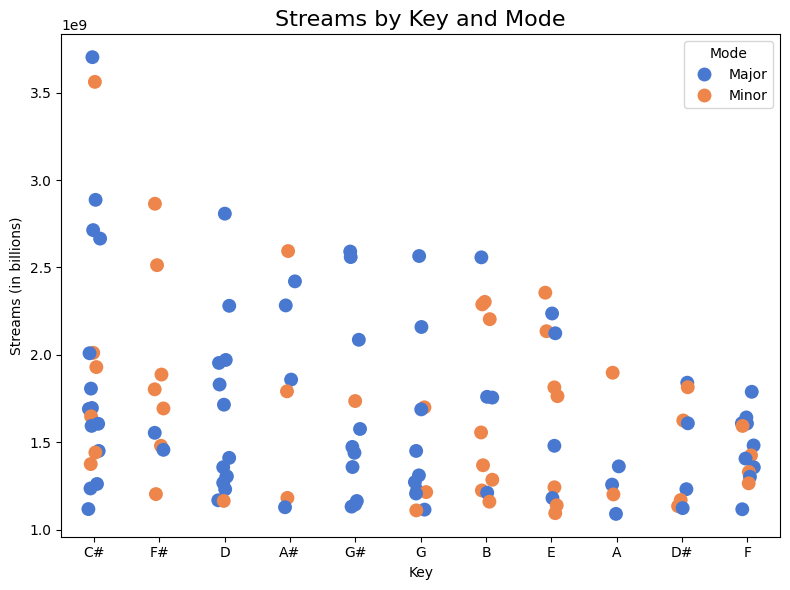

In [23]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Key', y='Streams', hue='Mode', data=df, jitter=True, palette='muted', size=10)
plt.title('Streams by Key and Mode', fontsize=16)
plt.ylabel('Streams (in billions)')
plt.xlabel('Key')
plt.legend(title='Mode', loc='upper right')
plt.tight_layout()
plt.show()


<b><p>Q5) What are some Python libraries (or libraries in other programming languages) you think are fun or interesting to use?</p></b>

Aside from the well-known libraries like pandas and scikit-learn, I’ve come across a few that are both useful and fun to explore:
	<p>1.	Plotly/Dash</p>
	<p>2.	NetworkX</p>
	<p>3.	SymPy</p>
	<p>4.	Streamlit</p>
	<p>5.	PyCaret</p>
	<p>6.	GeoPandas and Shapely</p>
	<p>7.	Advertools</p>
	<p>8.	Facebook Prophet</p>
	<p>9.	Apache Kafka</p>
	<p>10. 	Pytorch</p>

<p>For other programming languages:</p>
	<p>1.	D3.js (JavaScript)</p>
	<p>2.	Google Ads API</p>


## Q6) What tools do you use to help you code productively?

## Tools and Frameworks I Use for Productive Coding

### Editor/IDE
- **VS Code**: I primarily use VS Code because it’s lightweight, flexible, and has great extensions for Python, Git integration, and debugging.
- **PyCharm**: For larger Python projects, I prefer PyCharm since it makes debugging and refactoring code easier.

### Testing Framework
- **Pytest**: I use Pytest for writing tests. It’s straightforward to use and supports parameterized testing, which is very helpful in covering different scenarios efficiently.

### Code Linters and Formatters
- **Black**: To keep my code clean and consistent, I rely on Black for formatting.
- **Flake8**: I use Flake8 to ensure my code follows PEP 8 standards.

### Command Line Tools
- **tmux**: I use tmux to manage multiple terminal sessions efficiently, especially when working on remote servers.
- **jq**: This tool is great for working with JSON data, which I often deal with when pulling marketing metrics from APIs.
- **wget/cURL**: These are handy for downloading files quickly or testing API endpoints without needing a full script.

### Marketing-Specific Tools
- **Google Ads Scripts**: I use this to automate reporting and adjust campaigns.
- **SEMRush API**: This tool helps me programmatically analyze keywords, backlinks, and overall SEO performance.
- **Tableau**: While it’s mainly for visualization, I find it invaluable for presenting marketing data in a clear and interactive way.
- **Supermetrics**: This tool automates data extraction from platforms like Facebook Ads, Google Ads, and LinkedIn Ads, consolidating everything into a central location.

### Version Control
- **Git**: I use Git with GitHub or GitLab for all collaborative projects. I also use the GitLens extension in VS Code to easily track code changes and review history.

### Other Tools
- **Jupyter Notebooks**: These are excellent for presenting analysis and insights, especially when I’m analyzing ad campaign performance.
- **Docker**: I use Docker to create consistent environments, particularly when deploying tools or models.
- **Dataiku**: It’s a powerful platform for building complete data workflows, and I’ve used it for various data integration tasks.

### New Tools I’m Exploring
- **LangChain**: This library is for integrating large language models into applications, and I think it could be useful for personalized marketing or generating ad copy.
- **dbt**: I recently started looking into dbt, a data transformation tool, which seems promising for improving how we process campaign data and create better reporting workflows.
- **GA4 API**: Google’s new Analytics API offers deeper insights into user behavior, and while I’ve only scratched the surface, it looks like it will be a game-changer for marketing analytics.
